## OPTIMIZATION PROJECT 1

**Group 12 Members**
1. Bhuvana Chandrika Kothapalli (bk24542)
2. Mayank Gupta (mg66426)
3. Anmol Agrawal (aa96674)
4. Anvesh Karangula (ak49956)

In [1]:
from numpy import array, zeros, nan_to_num, inf
import gurobipy as gp
from gurobipy import GRB
from pandas import read_csv, Series, DataFrame
import warnings
import numpy as np
import pandas as pd
NoneType = type(None)
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

**1. Assume that your company is deciding how to spend a marketing budget of 10M dollars. You work in the marketing department as a data scientist and the chief marketing officer has asked you write a report recommending how to spread this budget among several marketing mediums. Your department has employed an outside consulting firm to estimate the return on investment 
(ROI) of each marketing medium under consideration. The results are in the table below, and also in a CSV attached to this assignment.**

In [2]:
data = read_csv("ROI_data.csv").set_index("Platform")
display(data)

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Platform,,,,,,,,,,
ROI,0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044
Second Firms ROI Estimate,0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026


In [3]:
mat = read_csv("roi_mat.csv").rename(columns= {"Unnamed: 0": "Month"}).set_index("Month")
display(mat)

,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9
June,4.0,3.2,2.7,3.4,3.4,3.0,4.5,2.10,3.8,4.1
July,3.9,3.6,2.0,4.4,3.9,3.7,4.3,1.80,4.0,3.8
August,4.2,3.3,2.8,4.2,2.0,3.7,3.6,1.50,4.4,4.3
September,4.1,2.8,2.5,4.2,2.9,3.7,2.8,2.50,4.0,3.4


**Objective Function:**
  
**Maximize** 0.031 * x1 + 0.049 * x2 + 0.024 * x3 + 0.039 * x4 + x5 + 0.016 * x6 + 0.046 * x7 + 0.026 * x8 + 0.033 * x9 + 0.044 * x10
  
**Variables:**
x1 = Budget allocation to Print  
x2 = Budget allocation to TV  
x3 = Budget allocation to SEO  
x4 = Budget allocation to AdWords  
x5 = Budget allocation to Facebook  
x6 = Budget allocation to LinkedIn  
x7 = Budget allocation to Instagram  
x8 = Budget allocation to Snapchat   
x9 = Budget allocation to Twitter   
x10 = Budget allocation to Email   

**2) On top of these ROIs, your boss has decided to constrain your budget as follows:  
a. The amount invested in print and TV should be no more than the amount spent on 
Facebook and Email. Surprisingly, email seems to be a great channel for reaching real 
people.  
b. The total amount used in social media (Facebook, LinkedIn, Instagram, Snapchat, and 
Twitter) should be at least twice of SEO and AdWords.  
c. For each platform, the amount invested should be no more than $3M**

**Constraints:**
1. x1 + x2 <= x5 + x10 (The budget spent on Print and TV should be no more than the budget spent on Facebook and Email)

2. x5 + x6 + x7 + x8 + x9 >= 2 * (x3 + x4) (The total budget used in social media should be at least twice the budget used in SEO and AdWords)

3. For each platform, the budget allocation should be no more than 3M:  
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 <= 3

4. Total budget spent should be less than or equal to 10M: 
x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8 + x9 + x10 <= 10

**3) Formulate the marketing budget allocation problem as a linear program. Use gurobi to find the
optimal budget allocation**

In [4]:
marketing_platforms = data.columns[0:]

# Create a Gurobi model
m = gp.Model()

# Decision Variables: Budget allocation for each marketing platform
x = m.addVars(marketing_platforms, name="budget_allocation", lb=0, ub=3000000)

# Define the objective function (maximize total ROI)
obj = gp.quicksum(data.iloc[0][platform] * x[platform] for platform in marketing_platforms)
m.setObjective(obj, sense=GRB.MAXIMIZE)

# Constraint 1: Total budget constraint
budget = 10000000
m.addConstr(gp.quicksum(x[platform] for platform in marketing_platforms) <= budget)

# Constraint 2: Budget limit for each platform
for platform in marketing_platforms:
    m.addConstr(x[platform] <= 3000000)

# Constraint 3: Print and TV constraint (update column names as per your data)
m.addConstr(x['TV'] + x['Print'] <= x['Facebook'] + x['Email'])

# Constraint 4: Social media constraint (update column names as per your data)
m.addConstr(x['Facebook'] + x['LinkedIn'] + x['Instagram'] + x['Snapchat'] + x['Twitter']
             >= 2 * (x['SEO'] + x['AdWords']))
m.Params.OutputFlag = 0
# Optimize the model
m.optimize()

# Display the results
if m.status == GRB.OPTIMAL:
    print("Optimal solution found")
    print(f"Total ROI: {m.objVal}")
    print("\nAllocation")
    allocation_df = pd.DataFrame({'Allocation': [x[platform].x for platform in marketing_platforms]},
                                 index=marketing_platforms)
    print(allocation_df)
else:
    print("No optimal solution found")

Restricted license - for non-production use only - expires 2024-10-28
Optimal solution found
Total ROI: 456000.0

Allocation
           Allocation
Print             0.0
TV          3000000.0
SEO               0.0
AdWords     1000000.0
Facebook          0.0
LinkedIn          0.0
Instagram   3000000.0
Snapchat          0.0
Twitter           0.0
Email       3000000.0


Maximum ROI on the investment of 10 Million is **$0.456 M**

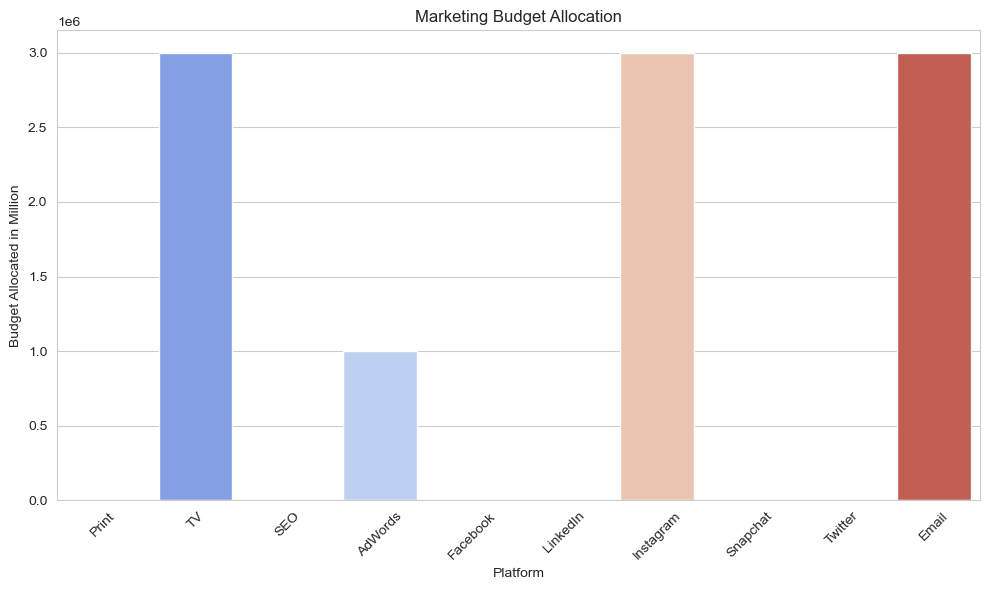

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the allocation values from the optimization results
allocation_values = [x[platform].x for platform in marketing_platforms]

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")  # Set the style
sns.barplot(x=marketing_platforms, y=allocation_values, palette='coolwarm')

# Customize the plot
plt.xlabel('Platform')
plt.ylabel('Budget Allocated in Million')
plt.title('Marketing Budget Allocation')

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()


The optimal budget allocation of the 1st firm would be to allocate $3M in TV, $1M in Adwords, $3M in Instagram and $3M in Email

**4) Your boss is happy to see the promising results presented by the marketing department. However, your boss is also very concerned because your boss recalls being somewhat disappointed after following such recommendations in the past. To be cautious about the decision, your team has decided to get another opinion about the ROI data and rerun the analysis. The second consulting firm returns the estimates of the ROI data in the table below (also in the CSV file mentioned above). You are asked to compare the two optimal allocations from these two ROI estimates.**

In [6]:
# Load the ROI data from the CSV file
data = pd.read_csv("ROI_data.csv").set_index("Platform")

# Define the marketing platforms
marketing_platforms = data.columns

# Create a Gurobi model for the second firm's ROI estimates
m_second_firm = gp.Model()

# Decision Variables: Budget allocation for each marketing platform
x_second_firm = m_second_firm.addVars(marketing_platforms, name="budget_allocation", lb=0, ub=3000000)

# Load the second firm's ROI estimates from the second row of the DataFrame
second_firm_roi = data.loc["Second Firms ROI Estimate"]

# Define the objective function (maximize total ROI) using the second firm's ROI estimates
obj_second_firm = gp.quicksum(second_firm_roi[platform] * x_second_firm[platform] for platform in marketing_platforms)
m_second_firm.setObjective(obj_second_firm, sense=GRB.MAXIMIZE)

# Constraint 1: Total budget constraint
budget = 10000000
m_second_firm.addConstr(gp.quicksum(x_second_firm[platform] for platform in marketing_platforms) <= budget)

# Constraint 2: Budget limit for each platform
for platform in marketing_platforms:
    m_second_firm.addConstr(x_second_firm[platform] <= 3000000)

# Constraint 3: Print and TV constraint (update column names as per your data)
m_second_firm.addConstr(x_second_firm['TV'] + x_second_firm['Print'] <= x_second_firm['Facebook'] + x_second_firm['Email'])

# Constraint 4: Social media constraint (update column names as per your data)
m_second_firm.addConstr(x_second_firm['Facebook'] + x_second_firm['LinkedIn'] + x_second_firm['Instagram'] + x_second_firm['Snapchat'] + x_second_firm['Twitter']
             >= 2 * (x_second_firm['SEO'] + x_second_firm['AdWords']))
m_second_firm.Params.OutputFlag = 0
# Optimize the model with the second firm's ROI estimates
m_second_firm.optimize()

# Display the results for the second firm
if m_second_firm.status == GRB.OPTIMAL:
    print("Optimal solution found for the second firm")
    print(f"Total ROI (Second Firm): {m_second_firm.objVal}")
    print("\nAllocation")
    allocation_df_second_firm = pd.DataFrame({'Allocation': [x_second_firm[platform].x for platform in marketing_platforms]},
                                 index=marketing_platforms)
    print(allocation_df_second_firm)
else:
    print("No optimal solution found for the second firm")


Optimal solution found for the second firm
Total ROI (Second Firm): 456000.0

Allocation
           Allocation
Print       3000000.0
TV                0.0
SEO               0.0
AdWords     1000000.0
Facebook    3000000.0
LinkedIn    3000000.0
Instagram         0.0
Snapchat          0.0
Twitter           0.0
Email             0.0


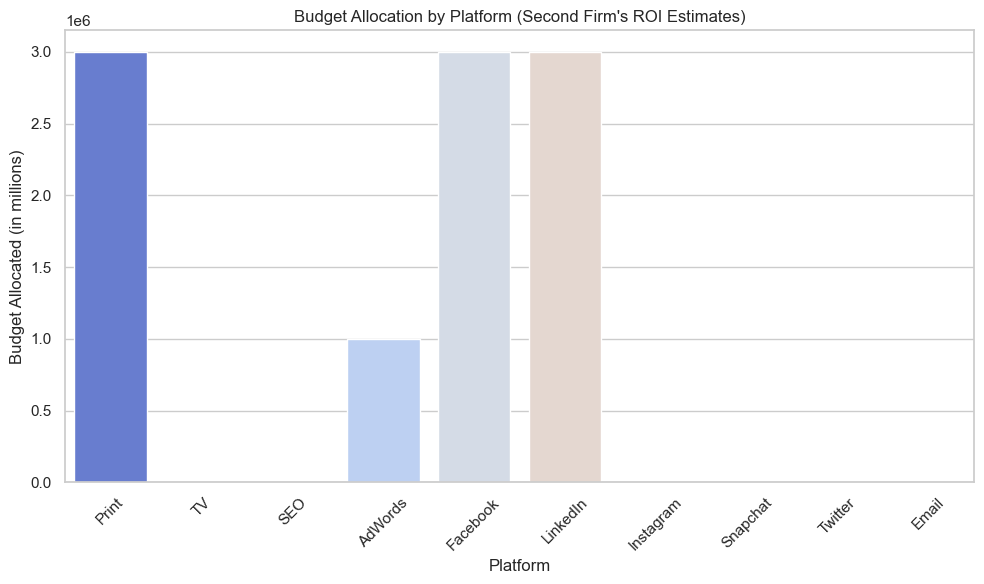

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the allocations from the second firm's optimization
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=marketing_platforms, y=[x_second_firm[platform].x for platform in marketing_platforms], palette='coolwarm')
ax.set(xlabel='Platform', ylabel='Budget Allocated (in millions)')
plt.title("Budget Allocation by Platform (Second Firm's ROI Estimates)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


The optimal budget allocation of 2nd firm would be to allocate $3M in Print, $1M in Adwords, $3M in Facebook and $3M in LinkedIn

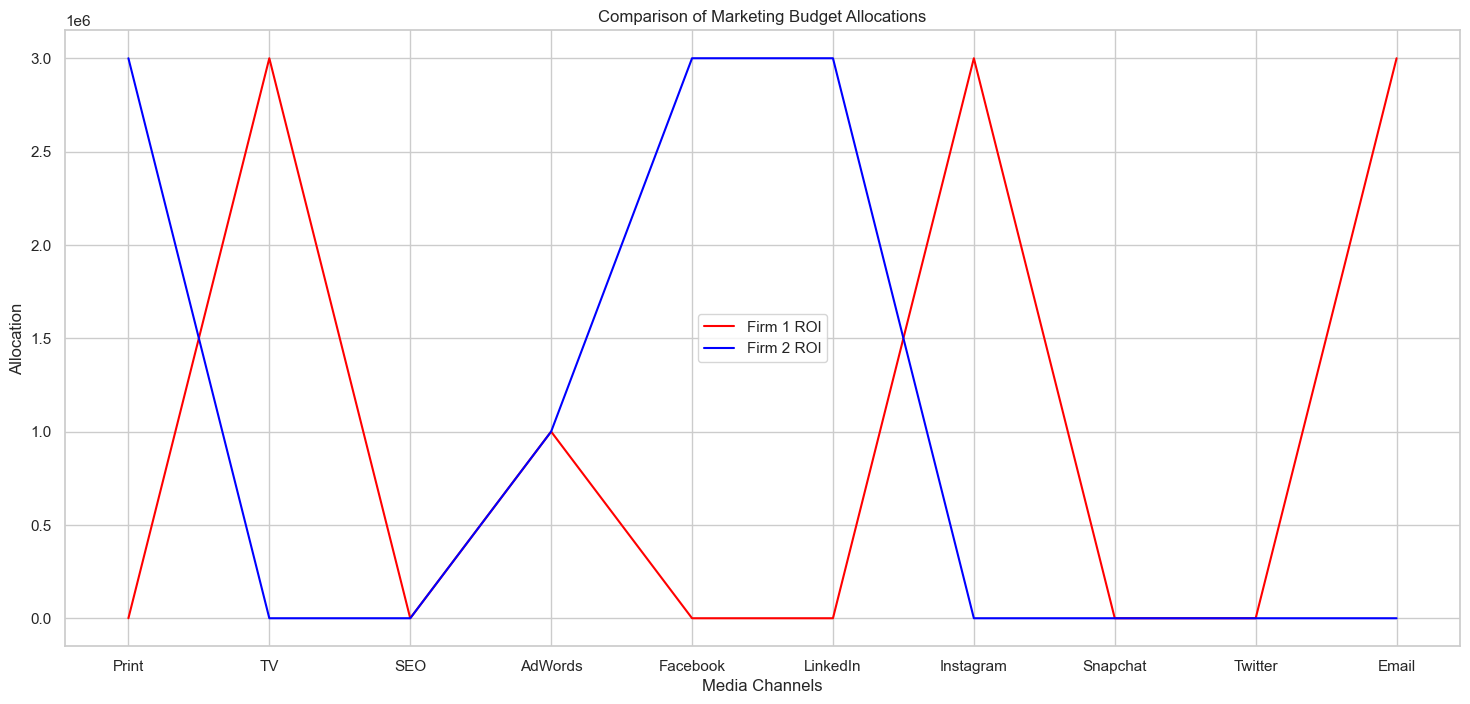

In [8]:
import matplotlib.pyplot as plt
fig1 = plt.figure(figsize=(18,8))
ax1 = fig1.add_subplot(111)

ax1.plot(allocation_df['Allocation'], color='red', label='Firm 1 ROI')
ax1.plot(allocation_df_second_firm['Allocation'], color='blue', label='Firm 2 ROI')
plt.title('Comparison of Marketing Budget Allocations')
plt.xlabel('Media Channels')
plt.ylabel('Allocation')
plt.legend()

The fact that the optimal budget allocations for the 1st and 2nd firms differ based on the estimates from the two firms suggests that these allocations are sensitive to the underlying ROI data. This sensitivity highlights the importance of accurate and reliable ROI estimates in making marketing budget decisions. Small changes in ROI data can lead to significantly different budget allocation recommendations, which can affect the overall performance of the marketing campaigns.

**5) Are the allocations the same? Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)? Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective? Do you think the third constraint above, based on your boss’ experience, is useful?**

A.  Are the allocations the same?

The allocations are different for the two scenarios. In the first allocation, more budget is allocated to Print, Facebook, and LinkedIn, while in the second allocation, more budget is allocated to TV, Instagram, and Email.

B. Assuming the first ROI data is correct, if you were to use the second allocation (the allocation that assumed the second ROI data was correct) how much lower would the objective be relative to the optimal objective (the one that uses the first ROI data and the first allocation)?

In [9]:
# Calculate the objective value using the first ROI data and second allocation
objective_first_firm_second_allocation = sum(data.iloc[0][platform] * x_second_firm[platform].x for platform in marketing_platforms)

# Calculate the difference in objectives
objective_difference_second_allocation = m.objVal - objective_first_firm_second_allocation

print(f"The value of the objective obtained would be {objective_first_firm_second_allocation}")
print(f"This value would be lesser than the optimal objective by {objective_difference_second_allocation}")


The value of the objective obtained would be 252000.0
This value would be lesser than the optimal objective by 204000.0


C. Assuming the second ROI data is correct, if you used the first allocation how much lower would the objective be relative to the optimal objective?

In [10]:
# Calculate the objective value using the second ROI data and first allocation
objective_second_firm_first_allocation = sum(second_firm_roi[platform] * x[platform].x for platform in marketing_platforms)

# Calculate the difference in objectives
objective_difference_first_allocation = m_second_firm.objVal - objective_second_firm_first_allocation

print(f"The value of the objective obtained would be: {objective_second_firm_first_allocation}")
print(f"This value would be lesser than the optimal objective by: {objective_difference_first_allocation}")


The value of the objective obtained would be: 264000.0
This value would be lesser than the optimal objective by: 192000.0


D. Do you think the third constraint above, based on your boss’ experience, is useful?

Removing 3M budget constraint for 1st one

In [11]:
marketing_platforms = data.columns[0:]

# Create a Gurobi model
m1 = gp.Model()

# Decision Variables: Budget allocation for each marketing platform
x1 = m1.addVars(marketing_platforms, name="budget_allocation", lb=0)

# Define the objective function (maximize total ROI)
obj = gp.quicksum(data.iloc[0][platform] * x1[platform] for platform in marketing_platforms)
m1.setObjective(obj, sense=GRB.MAXIMIZE)

# Constraint 1: Total budget constraint
budget = 10000000
m1.addConstr(gp.quicksum(x1[platform] for platform in marketing_platforms) <= budget)

# Constraint 2: Print and TV constraint (update column names as per your data)
m1.addConstr(x1['TV'] + x1['Print'] <= x1['Facebook'] + x1['Email'])

# Constraint 3: Social media constraint (update column names as per your data)
m1.addConstr(x1['Facebook'] + x1['LinkedIn'] + x1['Instagram'] + x1['Snapchat'] + x1['Twitter']
             >= 2 * (x1['SEO'] + x1['AdWords']))
m1.Params.OutputFlag = 0
# Optimize the model
m1.optimize()

# Display the results
if m1.status == GRB.OPTIMAL:
    print("Optimal solution found")
    print(f"Total ROI: {m1.objVal}")
    print("\nAllocation")
    allocation_df = pd.DataFrame({'Allocation': [x1[platform].x for platform in marketing_platforms]},
                                 index=marketing_platforms)
    print(allocation_df)
else:
    print("No optimal solution found")


Optimal solution found
Total ROI: 465000.0

Allocation
           Allocation
Print             0.0
TV          5000000.0
SEO               0.0
AdWords           0.0
Facebook          0.0
LinkedIn          0.0
Instagram         0.0
Snapchat          0.0
Twitter           0.0
Email       5000000.0


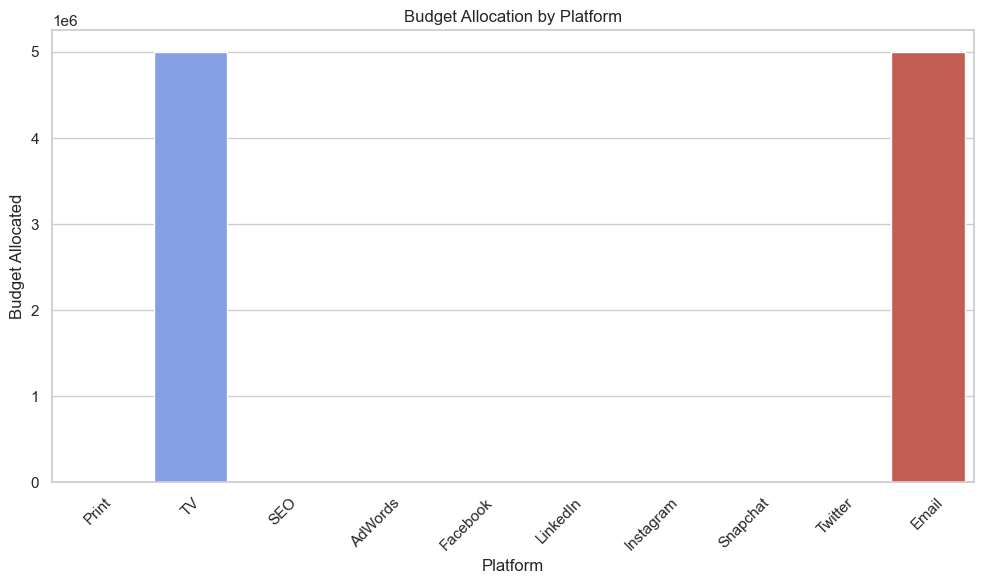

In [12]:
# Plot the allocation using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=marketing_platforms, y=[x1[platform].x for platform in marketing_platforms], palette='coolwarm')
ax.set(xlabel='Platform', ylabel='Budget Allocated')
plt.title("Budget Allocation by Platform")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Removing 3M budget constraint for 2nd one

In [13]:
# Define the marketing platforms
marketing_platforms = data.columns

# Create a Gurobi model for the second firm's ROI estimates
m_second_firm_2 = gp.Model()

# Decision Variables: Budget allocation for each marketing platform
x_second_firm_2 = m_second_firm_2.addVars(marketing_platforms, name="budget_allocation", lb=0)

# Load the second firm's ROI estimates from the second row of the DataFrame
second_firm_roi = data.loc["Second Firms ROI Estimate"]

# Define the objective function (maximize total ROI) using the second firm's ROI estimates
obj_second_firm = gp.quicksum(second_firm_roi[platform] * x_second_firm_2[platform] for platform in marketing_platforms)
m_second_firm_2.setObjective(obj_second_firm, sense=GRB.MAXIMIZE)

# Constraint 1: Total budget constraint
budget = 10000000
m_second_firm_2.addConstr(gp.quicksum(x_second_firm_2[platform] for platform in marketing_platforms) <= budget)

# Constraint 2: Print and TV constraint 
m_second_firm_2.addConstr(x_second_firm_2['TV'] + x_second_firm_2['Print'] <= x_second_firm_2['Facebook'] + x_second_firm_2['Email'])

# Constraint 3: Social media constraint 
m_second_firm_2.addConstr(x_second_firm_2['Facebook'] + x_second_firm_2['LinkedIn'] + x_second_firm_2['Instagram'] + x_second_firm_2['Snapchat'] + x_second_firm_2['Twitter']
             >= 2 * (x_second_firm_2['SEO'] + x_second_firm_2['AdWords']))
m_second_firm_2.Params.OutputFlag = 0
# Optimize the model with the second firm's ROI estimates
m_second_firm_2.optimize()

# Display the results for the second firm
if m_second_firm_2.status == GRB.OPTIMAL:
    print("Optimal solution found for the second firm")
    print(f"Total ROI (Second Firm): {m_second_firm_2.objVal}")
    print("\nAllocation")
    allocation_df_second_firm = pd.DataFrame({'Allocation': [x_second_firm_2[platform].x for platform in marketing_platforms]},
                                 index=marketing_platforms)
    print(allocation_df_second_firm)
else:
    print("No optimal solution found for the second firm")

Optimal solution found for the second firm
Total ROI (Second Firm): 465000.0

Allocation
           Allocation
Print       5000000.0
TV                0.0
SEO               0.0
AdWords           0.0
Facebook    5000000.0
LinkedIn          0.0
Instagram         0.0
Snapchat          0.0
Twitter           0.0
Email             0.0


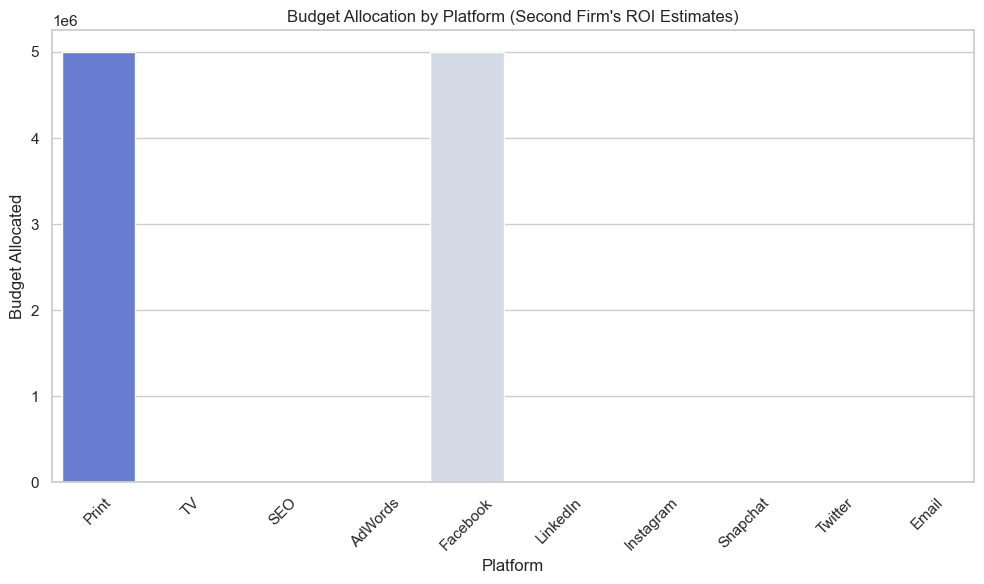

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=marketing_platforms, y=[x_second_firm_2[platform].x for platform in marketing_platforms], palette='coolwarm')
ax.set(xlabel='Platform', ylabel='Budget Allocated')
plt.title("Budget Allocation by Platform (Second Firm's ROI Estimates)")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Maximum profit returned is more without the constraint.  465000.0  USD

This is more than the ROI gained with the third constraint  456000.0  and  456000.0  by  9000.0  USD 

 Removing the third constraint leads to a higher profit and doesn't influence optimal solution but it's important to consider the practical aspects of budget allocation. In the current optimal solution, only two media types are included in the budget allocation for media spending. This may not align with our overall marketing strategy, which likely involves a more diversified approach across various platforms. Allocating the budget with limitations ensures a more balanced and diversified allocation, reducing the risk of overconcentration on a small set of platforms. 

**6.To explore this further perform some analysis of how your optimal allocation would change based on changes in the ROI data. Use the first ROI data as your starting point. By how much could each advertising medium’s ROI increase or decrease and still result in the same optimal allocation you found in step (3)?**

In [15]:
upper_bound=m.SAObjUp
lower_bound=m.SAObjLow
index_channels=['Print','TV','SEO','Adwords','Facebook','LinkedIn','Instagram','Snapchat','Twitter','Email']
bounds=pd.DataFrame({'Lower Bounds':lower_bound,'Upper Bounds':upper_bound},index=index_channels)
display(bounds)

,Lower Bounds,Upper Bounds
Print,-inf,0.049
TV,0.039,0.062
SEO,-inf,0.039
Adwords,0.033,0.046
Facebook,-inf,0.029
LinkedIn,-inf,0.039
Instagram,0.039,inf
Snapchat,-inf,0.039
Twitter,-inf,0.039
Email,0.029,inf


To verify that the optimal allocation remains unchanged, even when the return on investments (ROIs) for each advertising medium vary within the specified upper and lower bounds, let's examine the allocations when all ROIs are set to their upper-bound values.

In [16]:
# Define the marketing platforms
marketing_platforms = data.columns

# Create a Gurobi model
m2 = gp.Model()

# Decision Variables: Budget allocation for each marketing platform
x2 = m2.addVars(marketing_platforms, name="budget_allocation", lb=0, ub=3000000)

# Define the objective function (maximize total ROI)
obj = gp.quicksum(data.iloc[0][platform] * x2[platform] for platform in marketing_platforms)
m2.setObjective(obj, sense=GRB.MAXIMIZE)

# Constraint 1: Total budget constraint
budget = 10000000
m2.addConstr(gp.quicksum(x2[platform] for platform in marketing_platforms) <= budget)

# Constraint 2: Budget limit for each platform
for platform in marketing_platforms:
    m2.addConstr(x2[platform] <= 3000000)

# Constraint 3: Print and TV constraint (update column names as per your data)
m2.addConstr(x2['TV'] + x2['Print'] <= x2['Facebook'] + x2['Email'])

# Constraint 4: Social media constraint (update column names as per your data)
m2.addConstr(x2['Facebook'] + x2['LinkedIn'] + x2['Instagram'] + x2['Snapchat'] + x2['Twitter']
             >= 2 * (x2['SEO'] + x2['AdWords']))
m2.Params.OutputFlag = 0
# Optimize the model
m2.optimize()

# Display the results
if m2.status == GRB.OPTIMAL:
    print("Optimal solution found")
    print(f"Total ROI: {m2.objVal}")
    print("\nAllocation")
    allocation_df = pd.DataFrame({'Allocation': [x2[platform].x for platform in marketing_platforms]},
                                 index=marketing_platforms)
    print(allocation_df)
else:
    print("No optimal solution found")

Optimal solution found
Total ROI: 456000.0

Allocation
           Allocation
Print             0.0
TV          3000000.0
SEO               0.0
AdWords     1000000.0
Facebook          0.0
LinkedIn          0.0
Instagram   3000000.0
Snapchat          0.0
Twitter           0.0
Email       3000000.0


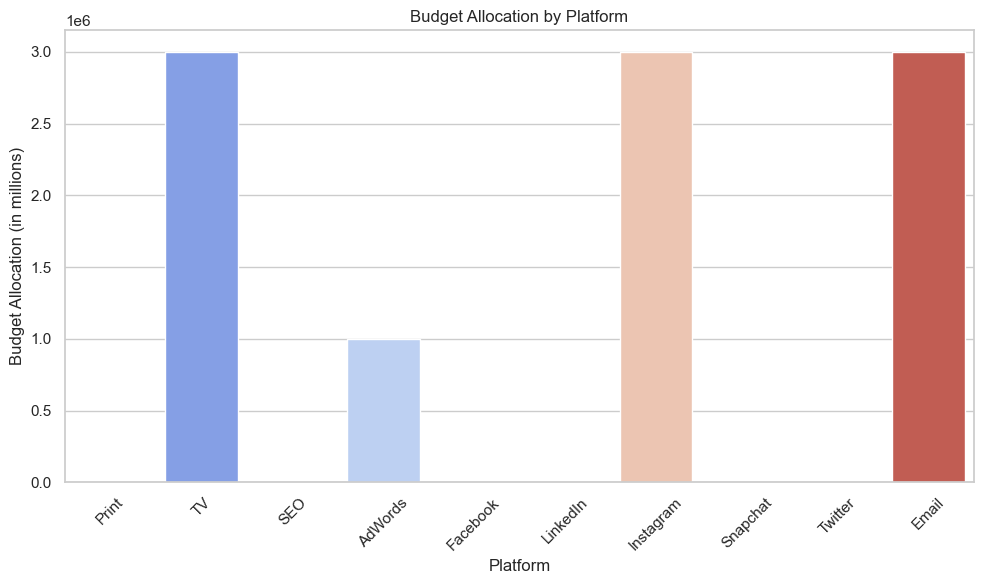

In [17]:
# Plot the budget allocation using Seaborn's coolwarm palette
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=marketing_platforms, y=[x2[platform].x for platform in marketing_platforms], palette='coolwarm')
ax.set(xlabel='Platform', ylabel='Budget Allocation (in millions)')
plt.title("Budget Allocation by Platform")
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

Here, we can see the allocations are same as the 1st one.

**7.Your boss has gained permission to reinvest half of the return. For example, if the marketing obtains a 4% return in January, the budget of February will be $10M + $10M × 4% × 50% = $10.2M. The monthly ROI for next year is given in an attached csv file. The three constraints given by your boss are still in place for each month. What is the optimal allocation for each month?**

In [18]:
df = pd.read_csv('roi_mat.csv')
df.head()

,Unnamed: 0,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
0,January,4.0,3.6,2.4,3.9,3.0,3.5,3.6,2.25,3.5,3.5
1,February,4.0,3.9,2.7,3.8,4.3,3.2,2.7,1.80,3.7,3.5
2,March,3.5,2.9,3.1,3.8,2.4,4.1,3.7,2.60,4.2,2.5
3,April,3.8,3.1,2.4,4.4,2.4,3.8,3.7,2.50,3.6,2.9
4,May,3.5,3.2,1.9,3.4,2.7,2.7,3.9,2.20,4.5,3.9


In [19]:
list(df.iloc[0,1:])

[4.0, 3.6, 2.4, 3.9, 3.0, 3.5, 3.6, 2.25, 3.5, 3.5]

In [20]:
budget = 10
monthly = []
budgets_monthly = []
returns_monthly = []
for i in range(12):
    ojMod=gp.Model()
    budgets_monthly.append(budget)
    ojModX = ojMod.addMVar(10,ub=3)
    objcoeff = list(df.iloc[i,1:])
    ojMod.setObjective(gp.quicksum(ojModX[j]*(objcoeff[j]/100) for j in range(10)),sense=gp.GRB.MAXIMIZE)
    conlist=[0]*3
    conlist[0] = ojMod.addConstr(gp.quicksum(ojModX[i] for i in range(10)) <= budget)
    conlist[1] = ojMod.addConstr(ojModX[0]+ojModX[1]-ojModX[4]-ojModX[9] <= 0)
    conlist[2] = ojMod.addConstr(ojModX[4]+ojModX[5]+ojModX[6]+ojModX[7]+ojModX[8]-2*ojModX[2]-2*ojModX[3] >= 0)
    ojMod.Params.OutputFlag = 0
    ojMod.optimize()
    # Calculate the returns for this month
    returns = sum(objcoeff[j] / 100 * ojModX[j].x for j in range(10))
    monthly.append(list(ojModX.x)+ [returns])
    
    budget = 10
    budget += 0.5 * returns
    
    # Append the returns for this month to the list of monthly returns
    returns_monthly.append(returns)

columns = ['Print', 'TV', 'SEO', 'AdWords', 'Facebook', 'LinkedIn', 'Instagram', 'Snapchat', 'Twitter', 'Email', 'Returns']
df_results = pd.DataFrame(monthly, columns=columns)
df_results['Budgets'] = budgets_monthly
df_results['Month'] = df.iloc[:, 0]
df_results.set_index('Month', inplace=True)


# Display the results
print("Monthly Budget Allocations and Returns:")
display(df_results)

Monthly Budget Allocations and Returns:


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email,Returns,Budgets
Month,,,,,,,,,,,,
January,3.000000,0.000000,0.0,1.333333,0.000000,0.0,2.666667,0.0,0.000000,3.000000,0.373000,10.000000
February,3.000000,0.000000,0.0,2.395500,3.000000,0.0,0.000000,0.0,1.791000,0.000000,0.406296,10.186500
March,0.000000,0.000000,0.0,3.000000,0.000000,3.0,1.203148,0.0,3.000000,0.000000,0.407516,10.203148
April,0.000000,0.000000,0.0,3.000000,0.000000,3.0,3.000000,0.0,1.203758,0.000000,0.400335,10.203758
May,1.200168,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,3.000000,3.000000,0.411006,10.200168
June,3.000000,0.000000,0.0,0.000000,0.000000,0.0,3.000000,0.0,1.205503,3.000000,0.423809,10.205503
July,0.000000,0.000000,0.0,3.000000,1.211905,0.0,3.000000,0.0,3.000000,0.000000,0.428264,10.211905
August,2.714132,0.000000,0.0,1.500000,0.000000,0.0,0.000000,0.0,3.000000,3.000000,0.437994,10.214132
September,0.609498,0.000000,0.0,3.000000,0.000000,3.0,0.000000,0.0,3.000000,0.609498,0.402712,10.218997


 **8.A stable budget is defined as a monthly allocation such that for each platform the monthly change in spend is no more than $1M. Is the allocation you found stable? If it isn’t, you do not need to solve a new optimization model. Describe how my might model this?**

In [21]:
ojMod=gp.Model()
ojModX = ojMod.addMVar(10)
#objcoeff = [0.031,0.049,0.024,0.039,0.016,0.024,0.046,0.026,0.033,0.044]
objcoeff = [0.049,0.023,0.024,0.039,0.044,0.046,0.026,0.019,0.037,0.026]
ojMod.setObjective(gp.quicksum(ojModX[i]*objcoeff[i] for i in range(10)),sense=gp.GRB.MAXIMIZE)
conlist=[0]*3
# then come back and change the list entries one by one to represent each constraint
conlist[0] = ojMod.addConstr(gp.quicksum(ojModX[i] for i in range(10)) <= 10)
conlist[1] = ojMod.addConstr(ojModX[0]+ojModX[1]-ojModX[4]-ojModX[9] <= 0)
conlist[2] = ojMod.addConstr(ojModX[4]+ojModX[5]+ojModX[6]+ojModX[7]+ojModX[8]-2*ojModX[2]-2*ojModX[3] >= 0)
ojMod.Params.OutputFlag = 0
ojMod.optimize()
print(ojMod.objVal)
print(ojModX.x)

0.46499999999999997
[5. 0. 0. 0. 5. 0. 0. 0. 0. 0.]


In [22]:
# Calculate the differences in budget allocation between consecutive months
differences = [list(-df_results.iloc[i - 1, :-2] + df_results.iloc[i, :-2]) for i in range(1, 12)]

# Create a DataFrame to store the differences
df_differences = pd.DataFrame(differences, columns=df_results.columns[:-2])

# Get the months (excluding the first month)
months = list(df.iloc[1:, 0])

# Add the months as a new column
df_differences['Month'] = months

# Set the 'Month' column as the index
df_differences.set_index('Month', inplace=True)

# Define a custom style function to apply background colors
def highlight_differences(val):
    color = 'background-color: '
    if val < 0:
        return f'{color}red'
    elif val > 0:
        return f'{color}green'
    else:
        return ''

# Apply the custom styling function to the DataFrame
styled_df = df_differences.style.applymap(highlight_differences)

# Display the styled DataFrame
styled_df


,Print,TV,SEO,AdWords,Facebook,LinkedIn,Instagram,Snapchat,Twitter,Email
Month,,,,,,,,,,
February,0.000000,0.000000,0.000000,1.062167,3.000000,0.000000,-2.666667,0.000000,1.791000,-3.000000
March,-3.000000,0.000000,0.000000,0.604500,-3.000000,3.000000,1.203148,0.000000,1.209000,0.000000
April,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.796852,0.000000,-1.796242,0.000000
May,1.200168,0.000000,0.000000,-3.000000,0.000000,-3.000000,0.000000,0.000000,1.796242,3.000000
June,1.799832,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.794497,0.000000
July,-3.000000,0.000000,0.000000,3.000000,1.211905,0.000000,0.000000,0.000000,1.794497,-3.000000
August,2.714132,0.000000,0.000000,-1.500000,-1.211905,0.000000,-3.000000,0.000000,0.000000,3.000000
September,-2.104634,0.000000,0.000000,1.500000,0.000000,3.000000,0.000000,0.000000,0.000000,-2.390502
October,-0.609498,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,-3.000000,0.591858


The budget allocation for various marketing platforms exhibits fluctuations over the months, with some months experiencing significant changes exceeding $1 million in spending for specific platforms. To address this issue, it may be advisable to enhance the optimization model by incorporating constraints that limit monthly spending fluctuations, ensuring a more stable and predictable budget allocation over time.





